In [1]:
import pandas as pd
import numpy as np
import helper
import missingno as msno



## load all variables

In [2]:
## load target
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])

In [3]:
## weather
weather = pd.read_csv('cleaned_data/weather.csv', index_col=0, parse_dates=['Time'])

## Environmental Violations
env_viol = pd.read_csv('cleaned_data/env_violation.csv', index_col=0, parse_dates=['Time'])
# env_viol.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)

## Daycare
daycare = pd.read_csv('cleaned_data/daycare.csv', index_col=0, parse_dates=['Time'])
# daycare.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)

## key_econ
econ = pd.read_csv('cleaned_data/key_econ.csv', index_col=0, parse_dates= ['Time'])

## City unemployment
city_unemp = pd.read_csv('cleaned_data/city_unemployment_rates.csv', index_col=0, parse_dates= ['Time'])

## Monthly gas prices
gas_prices = pd.read_csv('cleaned_data/monthly_avg_gas_prices.csv', index_col=0, parse_dates= ['Time'])

## Monthly TNX
monthly_tnx = pd.read_csv('cleaned_data/monthly_tnx.csv', index_col=0, parse_dates= ['Time'])

## polling
polling = pd.read_csv('cleaned_data/poll_clean.csv', index_col=0, parse_dates=['Time'])

## Covid
covid = pd.read_csv('cleaned_data/covid_clean.csv', index_col=0, parse_dates=['Time'])

## new_biz_frames
# new_biz_ins = pd.read_csv('cleaned_data/new_biz_outlet_inside.csv', index_col=1, parse_dates= {'Time':['month', 'year']})
new_biz_out = pd.read_csv('cleaned_data/new_biz_outlet.csv', index_col=1, parse_dates= ['Time'])
new_biz_tax = pd.read_csv('cleaned_data/new_biz_taxpayer.csv', index_col=1, parse_dates= ['Time'])

# ## liquor permit
# liquor = pd.read_csv('cleaned_data/liquor_permit.csv', index_col=0, parse_dates= ['date'])
# liquor.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)


## Sales tax allocation
sales_tax = pd.read_csv('cleaned_data/sales_tax_allocation.csv', index_col=0, parse_dates= ['Time'])

## sap_case_shiller
sap = pd.read_csv('cleaned_data/sap_case_shiller.csv', index_col=0, parse_dates= ['Time'])

## ACS
acs = pd.read_csv('cleaned_data/acs_master11to18_clean.csv', index_col=0, parse_dates=['Time'])
acs2 = pd.read_csv('cleaned_data/acs2_clean.csv', index_col=0, parse_dates=['Time'])

<AxesSubplot:>

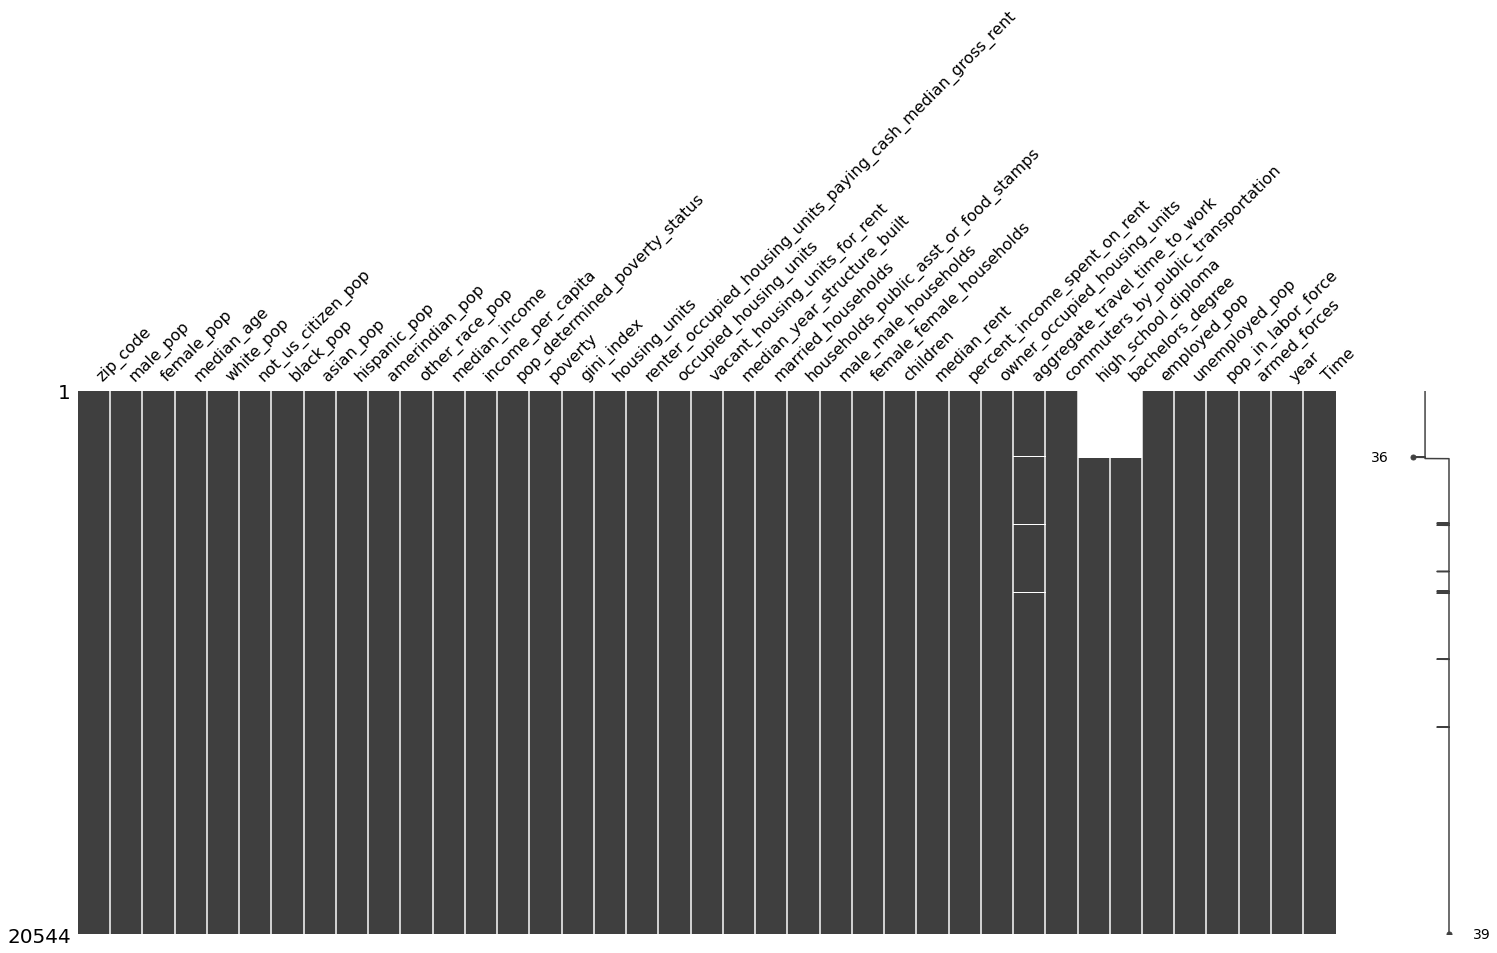

In [4]:
## Temporary merged to look at acs2
msno.matrix(acs)

In [5]:
## Get list of feature files
feature_frames = [weather, 
                   env_viol, 
                   daycare, 
                   econ, 
                   city_unemp, 
                   gas_prices, 
                   monthly_tnx, 
                   polling, 
                   covid, 
                   new_biz_out, 
                   new_biz_tax, 
                   sales_tax, 
                   sap,
                   acs,
                   acs2]
feature_frames_name = ['weather', 
                   'env_viol', 
                   'daycare', 
                   'econ', 
                   'city_unemp', 
                   'gas_prices', 
                   'monthly_tnx', 
                   'polling', 
                   'covid', 
                   'new_biz_out', 
                   'new_biz_tax', 
                   'sales_tax', 
                   'sap',
                   'acs',
                   'acs2']

## look at time ranges

In [6]:
for idx, frame in enumerate(feature_frames):
    date_range = str(frame['Time'].dt.date.min()) + ' to ' +str(frame['Time'].dt.date.max())
    print(f'{feature_frames_name[idx]}: {date_range}')

weather: 2012-01-01 to 2021-08-01
env_viol: 2012-01-01 to 2021-08-01
daycare: 2012-01-01 to 2021-09-01
econ: 2012-01-01 to 2021-08-01
city_unemp: 2011-07-01 to 2021-07-01
gas_prices: 2000-06-01 to 2021-08-01
monthly_tnx: 2010-01-01 to 2021-08-01
polling: 2011-02-01 to 2021-07-01
covid: 2012-01-01 to 2021-08-01


KeyError: 'Time'

## look at missing values in each

In [ ]:
for frame in feature_frames:
    msno.matrix(frame)
    

In [ ]:
acs2_set = set(pd.unique(acs2['zip_code']))
acs_set = set(pd.unique(main_frame['zip_code']))

In [ ]:
# Check for missing zip code. 75033
acs_set - acs2_set

In [ ]:
acs2[acs2.isna()]

In [ ]:
# lag_ = {12:['zori_ssa']}

### Create one master main-frame, no lag

In [ ]:
# main_frame = helper.time_lag_merge(main_frame, main_frame, lag_)
main_frame = helper.time_lag_merge(main_frame, weather)
main_frame = helper.time_lag_merge(main_frame, env_viol)
main_frame = helper.time_lag_merge(main_frame, daycare)
main_frame = helper.time_lag_merge(main_frame, econ)
main_frame = helper.time_lag_merge(main_frame, city_unemp)
main_frame = helper.time_lag_merge(main_frame, gas_prices)
main_frame = helper.time_lag_merge(main_frame, monthly_tnx)
main_frame = helper.time_lag_merge(main_frame, polling)
main_frame = helper.time_lag_merge(main_frame, covid)
main_frame = helper.time_lag_merge(main_frame, new_biz_ins)
main_frame = helper.time_lag_merge(main_frame, new_biz_out)
main_frame = helper.time_lag_merge(main_frame, new_biz_tax)
main_frame = helper.time_lag_merge(main_frame, liquor)
main_frame = helper.time_lag_merge(main_frame, sales_tax)
main_frame = helper.time_lag_merge(main_frame, sap)
main_frame = helper.time_lag_merge(main_frame, acs)
main_frame = helper.time_lag_merge(main_frame, acs2)

### Check missing values on large frame

In [ ]:
msno.matrix(main_frame)

In [ ]:
acs_cols

In [ ]:
main_frame = main_frame.sort_values('Time')

In [ ]:
main_frame

In [ ]:
msno.matrix(main_frame)

In [ ]:

main_frame[acs_cols].isna().any()

In [ ]:
## Check missing values of ACS
acs_cols = acs.columns.to_list()
# acs_cols
missing_vals = main_frame[main_frame[acs_cols].isna()]
missing_vals

In [ ]:
# # Check missing values rows 
# missing_vals = main_frame[main_frame['tx_is_a_lot_better'].isna()]

In [ ]:
main_frame.info()

In [ ]:
to_drop = ['outlet_taxpayer_non_tx_right', 'outlet_org_type_cl_right', 'outlet_org_type_is_right', 'outlet_org_type_foreign_right']    

In [ ]:
## Fill with zeros (change this later)
main_frame = main_frame.fillna(0)
main_frame = main_frame.drop(columns=['metro_right', 'State_right'])

# Check columns and missing values
# main_frame.info()

In [ ]:
# # Save csv
# main_frame.to_csv('all_vars.csv')